<a href="https://colab.research.google.com/github/Swayamprakashpatel/Sol_ME/blob/main/Sol_ME_LogP_MolWt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
#df = pd.read_csv('/content/drive/My Drive/DE.csv', low_memory=False,)
url = '/content/Data_FP_11.csv'
df = pd.read_csv(url, low_memory=False,) # Run for labeled data

#df.fillna('&',inplace=True)
df.drop('DRUG', axis = 1, inplace = True)
df.drop('CARRIER', axis = 1, inplace = True)

print(df.shape)
df.head()
df.dtypes
#df.columns[df.isna().any()].tolist()
dataset = df.values

(292, 1767)


In [ ]:
print(dataset)

[[272.25 611.7    2.4  ...   0.     0.     4.86]
 [272.25 356.5    2.4  ...   0.     0.    15.57]
 [272.25 354.5    2.4  ...   0.     0.    27.58]
 ...
 [477.4  621.     3.   ...   0.     0.     6.66]
 [477.4  354.5    3.   ...   0.     0.     6.66]
 [477.4  356.5    3.   ...   0.     0.     6.66]]


In [3]:
X1 = dataset[:,0:1]/1000 #(standardize wiht 1000)Mol.Wt of Drug
X2 = dataset[:,1:2]/1000 #(standardize wiht 1000)Mol Wt of Carrier
X3 = dataset[:,2:3]/100 #(standardize wiht 100)LogP of Drug
X4 = dataset[:,3:4]/100 #(standardize wiht 100)LogP of Drug
X5 = dataset[:,4:1766]
X = np.concatenate((X1, X2, X3, X4, X5), axis=1)
X = X.astype(np.int64)
#Y = dataset[:,1762:1763]
# Run this for labeled data
Y = dataset[:,1766:1767]


#Y = np.log(Y)
#print(X, X.shape,X.dtype)
#print(Y, Y.shape, Y.dtype)
#print(X, X.shape,Y, Y.shape)
print(pd.DataFrame(X).head)

<bound method NDFrame.head of      0     1     2     3     4     5     6     7     8     9     ...  \
0       0     0     0     0     1     1     0     0     0     0  ...   
1       0     0     0     0     1     1     0     0     0     0  ...   
2       0     0     0     0     1     1     0     0     0     0  ...   
3       0     0     0     0     1     1     0     0     0     0  ...   
4       0     0     0     0     1     1     0     0     0     0  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
287     0     0     0     0     1     1     1     0     0     0  ...   
288     0     0     0     0     1     1     1     0     0     0  ...   
289     0     0     0     0     1     1     1     0     0     0  ...   
290     0     1     0     0     1     1     1     0     0     0  ...   
291     0     0     0     0     1     1     1     0     0     0  ...   

                    1756                 1757                 1758  \
0                      0           

In [ ]:
print(Y)


[[ 4.86]
 [15.57]
 [27.58]
 ...
 [ 6.66]
 [ 6.66]
 [ 6.66]]


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3,random_state = 42 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 42)
import numpy as np

X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.float32)
Y_val = np.asarray(Y_val).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

filepath = '/content/drive/My Drive/SOLModel.hdf5'

checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=575, verbose =1)]
output_nodes = Y.shape[1]
print(output_nodes)


1


Streaming output truncated to the last 5000 lines.
44/44 [==============================] - 2s 39ms/step - loss: 10.5852 - root_mean_squared_error: 3.2535 - val_loss: 9.9178 - val_root_mean_squared_error: 3.1493
Epoch 7323/10000
42/44 [===========================>..] - ETA: 0s - loss: 11.3476 - root_mean_squared_error: 3.3686
Epoch 7323: val_root_mean_squared_error did not improve from 2.96078
44/44 [==============================] - 1s 30ms/step - loss: 11.1619 - root_mean_squared_error: 3.3409 - val_loss: 12.1345 - val_root_mean_squared_error: 3.4835
Epoch 7324/10000
43/44 [============================>.] - ETA: 0s - loss: 11.0514 - root_mean_squared_error: 3.3244
Epoch 7324: val_root_mean_squared_error did not improve from 2.96078
44/44 [==============================] - 2s 35ms/step - loss: 11.0310 - root_mean_squared_error: 3.3213 - val_loss: 9.7745 - val_root_mean_squared_error: 3.1264
Epoch 7325/10000
43/44 [============================>.] - ETA: 0s - loss: 11.5918 - root_mean_s

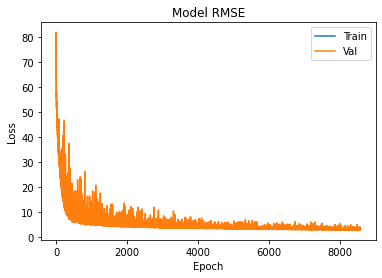

Training RMSE is
3.048945188522339
Validation RMSE is
2.8948848247528076
Training loss is
9.296066284179688
Validation loss is
8.38035774230957


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation='relu', input_shape=(1766,)),
                             tf.keras.layers.Dense(512, activation='relu'),
                             #tf.keras.layers.Dense(1762, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='relu')])

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.2), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model.fit(X, Y, epochs= 10000, callbacks=[checkpoint],validation_data=(X, Y), batch_size= None)
model.evaluate(X_test, Y_test)

# Error Graph

plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)



In [ ]:
model.save('model1.hdf5')

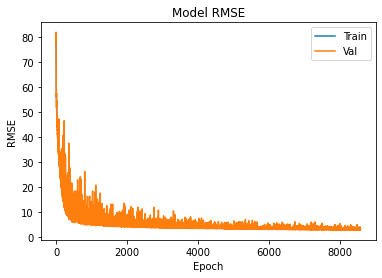

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.savefig('Training.svg', dpi = 600)



44/44 [==============================] - 0s 5ms/step


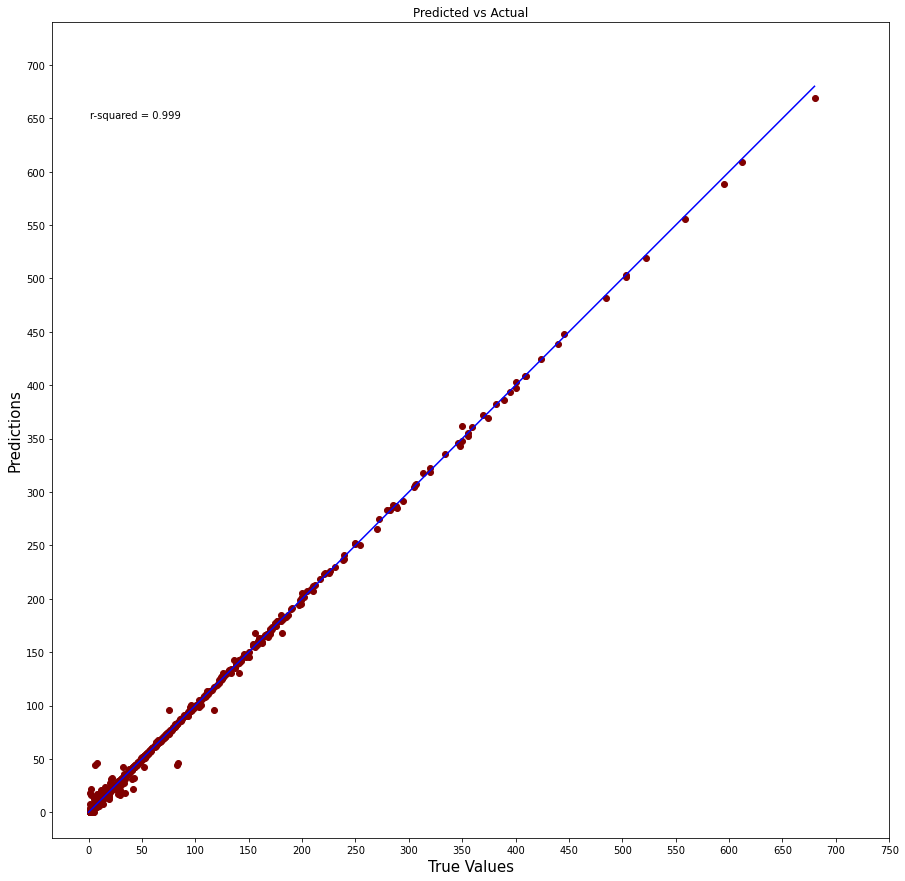

In [ ]:
from sklearn.metrics import r2_score
true_value = Y
predicted_value = model.predict(X)

plt.figure(figsize=(15,15))
plt.scatter(true_value, predicted_value, c='maroon')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Predicted vs Actual')
plt.annotate("r-squared = {:.3f}".format(r2_score(true_value, predicted_value)), (1,650), )
plt.xticks( range(0,800,50) )
plt.yticks( range(0,800,50) )
#plt.show()
plt.savefig('P_A.svg', dpi = 1200)

10/10 [==============================] - 0s 4ms/step


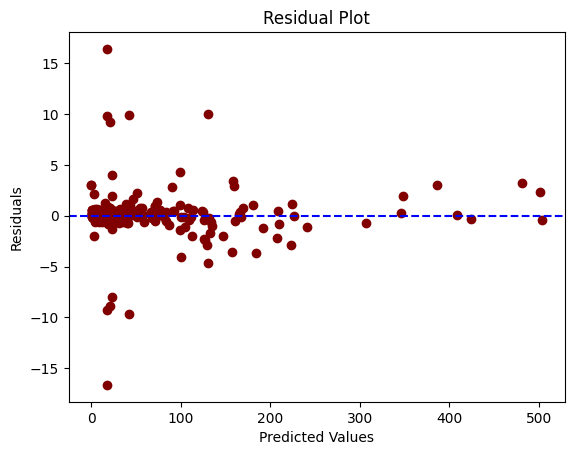

In [5]:
true_value = Y
predicted_value = model.predict(X)

residuals = true_value - predicted_value

plt.scatter(predicted_value, residuals, c='maroon')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
#plt.show()
plt.savefig('P_A.svg', dpi = 1200)

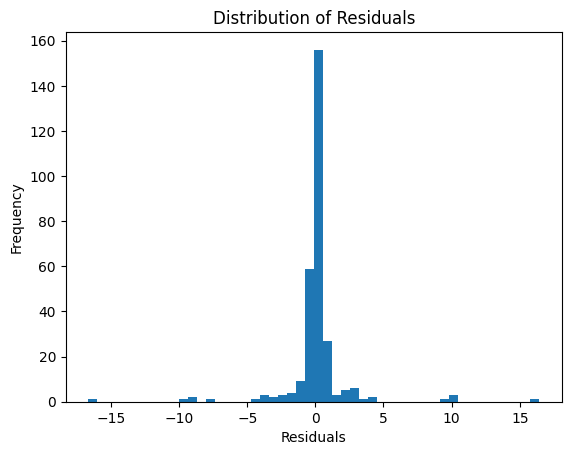

In [6]:
residuals = true_value - predicted_value

plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
#plt.show()
plt.savefig('P_A.svg', dpi = 1200)

In [1]:
#@title Insert PubChem Fingerprint of Drug and Carrier (Oil, Surfactant, Cosurfactant)
!pip install pubchempy
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1-nyzDQCzvTqDKyu9j7iXCl_GNwJ6wrw1',
                                   dest_path='/content/sample_data/Sol_ME.hdf5',
                                   unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile= True)


Drug_CID =  24872560#@param {type:"number"}
Excipient_CID =  3314#@param {type:"number"}

#LOGP of DRUG AND CARRIER
logp_D = pcp.Compound.from_cid(Drug_CID)
logp_D = logp_D.xlogp
logp_D = float(logp_D)/100

logp_C = pcp.Compound.from_cid(Excipient_CID)
logp_C = logp_C.xlogp
logp_C = float(logp_C)/100

#Mol. Wt of Drug and Excipeint
Molwt_of_Drug = pcp.Compound.from_cid(Drug_CID)
Molwt_of_Drug = Molwt_of_Drug.molecular_weight
Molwt_of_Drug = float(Molwt_of_Drug)/1000

Molwt_of_Excipient = pcp.Compound.from_cid(Drug_CID)
Molwt_of_Excipient = Molwt_of_Excipient.molecular_weight
Molwt_of_Excipient = float(Molwt_of_Excipient)/1000

#FINGERPRINT OF DRUG AND CARRIER
CID_D = pcp.Compound.from_cid(Drug_CID)
CID_E = pcp.Compound.from_cid(Excipient_CID)

FPD = CID_D.cactvs_fingerprint
FPE = CID_E.cactvs_fingerprint

List1 = [Molwt_of_Drug, Molwt_of_Excipient, logp_D, logp_C]

List2 = list(FPD)
List3 = list(FPE)
List = List1 + List2 + List3


import pandas as pd
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))

#@title RUN FOR PREDICTION


dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1766].astype(float))
#print(X_Predict)
#print(X_Predict.shape)
#print(X_Predict.dtype)

Y_prediction = model.predict(X_Predict)

print(Y_prediction, "mg/ml")

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=860fce7f55cd7debb8c52253d867e1ae86e7f12e2bc5a7079cdfc865c0b3c27e
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy
1/1 [==============================] - 0s 211ms/step
[[141.06665]] mg/ml


In [ ]:
#@title Insert PubChem Fingerprint of Drug and Carrier (Oil, Surfactant, Cosurfactant)
!pip install pubchempy
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1-nyzDQCzvTqDKyu9j7iXCl_GNwJ6wrw1',
                                   dest_path='/content/sample_data/Sol_ME.hdf5',
                                   unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile= True)


Drug_CID =  24872560#@param {type:"number"}
Excipient_CID =  3314#@param {type:"number"}
LogP_of_Drug =  11.3#@param {type:"number"}
LogP_of_Excipient =  2#@param {type:"number"}
MolWt_of_Drug =  11.3#@param {type:"number"}
MolWt_of_Excipient =  2#@param {type:"number"}

#LOGP of DRUG AND CARRIER

logp_D = LogP_of_Drug/100

logp_C = LogP_of_Excipient/100

#Mol.Wt of Drug and Carrier
MolWt_of_Drug = MolWt_of_Drug/1000
MolWt_of_Excipient =  MolWt_of_Excipient/1000

#FINGERPRINT OF DRUG AND CARRIER
CID_D = pcp.Compound.from_cid(Drug_CID)
CID_E = pcp.Compound.from_cid(Excipient_CID)

FPD = CID_D.cactvs_fingerprint
FPE = CID_E.cactvs_fingerprint

List1 = [MolWt_of_Drug, MolWt_of_Excipient, logp_D, logp_C]

List2 = list(FPD)
List3 = list(FPE)
List = List1 + List2 + List3


import pandas as pd
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))

#@title RUN FOR PREDICTION


dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1766].astype(float))
#print(X_Predict)
#print(X_Predict.shape)
#print(X_Predict.dtype)

Y_prediction = model.predict(X_Predict)

print(Y_prediction, "mg/ml")

In [ ]:
#@title UPLOAD EXCEL (Predict.xlsx) for Multiple Prediction
#Uploade Predict.xlsx file
!pip install pubchempy
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd
from google.colab import files
uploaded = files.upload()

gdd.download_file_from_google_drive(file_id='1-nyzDQCzvTqDKyu9j7iXCl_GNwJ6wrw1',
                                   dest_path='/content/sample_data/Sol_ME.hdf5',
                                   unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile= True)

df = pd.read_excel('/content/Predict.xlsx')
df1 = df.iloc[:, 0:1]
cidvals = df1['Drug_CID']
componentFingerprint = []
for cid in cidvals:
  c = pcp.Compound.from_cid(cid)
  componentFingerprint.append(c.cactvs_fingerprint)
  tm.sleep(0.1)

CD1 = df1.assign(fp=componentFingerprint)
i = 1
for  componentFingerprint in c.cactvs_fingerprint:
    CD1['fp'] = CD1['fp'].astype(str)
    CD1['fp'+str (i)] = CD1['fp'].str[i-1:i]
    i = i+ 1
#print(componentFingerprint)
#print(CD1)

# CID to Fingerprint: Second Drug
df = pd.read_excel('/content/Predict.xlsx')
df2 = df.iloc[:, 1:2]
cidvals = df2['Excipient_CID']
componentFingerprint = []
for cid in cidvals:
  c = pcp.Compound.from_cid(cid)
  componentFingerprint.append(c.cactvs_fingerprint)
  tm.sleep(0.1)

CD2 = df2.assign(fp=componentFingerprint)
i = 1
for  componentFingerprint in c.cactvs_fingerprint:
    CD2['fp'] = CD2['fp'].astype(str)
    CD2['fp'+str (i)] = CD2['fp'].str[i-1:i]
    i = i+ 1
#print(componentFingerprint)
#print(CD2)

CID= pd.DataFrame(pd.concat([CD1,CD2], axis = 1)) # Two CID Joined
CID_Data = CID.drop(['Drug_CID', 'fp','Excipient_CID'], axis=1, inplace = False)
OTHER = df.iloc[:, 2:6]

X_Predict = pd.DataFrame(pd.concat([CID_Data, OTHER],axis = 1))

X_Predict = X_Predict.values
#X_Predict.dtype = int
X_Predict = (X_Predict[:,0:1766].astype(float))

Y_prediction = model.predict(X_Predict)

print(Y_prediction, "mg/ml")

#@title Download Results in Excel
result = pd.DataFrame(Y_prediction)
Intact = pd.DataFrame(pd.concat([df1,df2,result], axis = 1))
Intact.to_excel("Solubility_Result.xlsx")
files.download('Solubility_Result.xlsx')

For Downloading Predict.xlsx [CLICK HERE](https://github.com/Swayamprakashpatel/Sol_ME/raw/main/Predict.xlsx)